# Домашняя работа по Matplotlib

## Подготовительная часть

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters() 
import seaborn as sns 
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## Первое задание

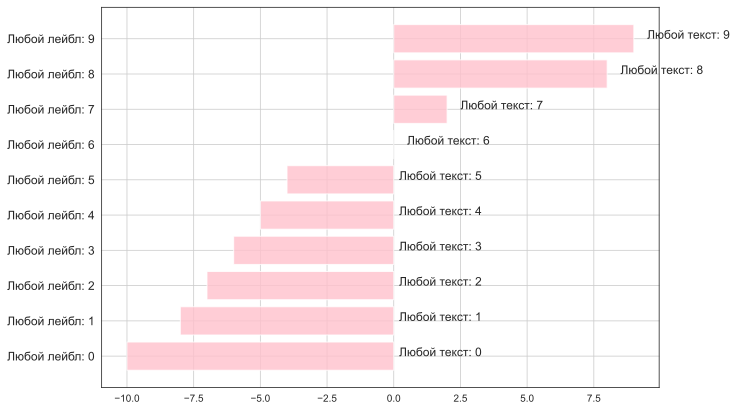

In [94]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['Любой лейбл: {}'.format(i) for i in range(10)]
labels = ['Любой текст: {}'.format(i) for i in range(10)]
figsize = (20, 10)

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    for i in range (10):
        ax.barh(i, bars_length[i], label=labels[i], color='pink', alpha=0.8)
        if bars_length[i]<0:
            ax.annotate(labels[i], xy=(0,i), xytext=(0.2,i), size=12)
        else:
            ax.annotate(labels[i], xy=(0,i), xytext=(bars_length[i]+0.5,i), size=12)
    ax.set_yticks(np.arange(0, 10))
    ax.set_yticklabels(yticks_labels, size=12)
    plt.grid(True)
    
plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

## Второе задание

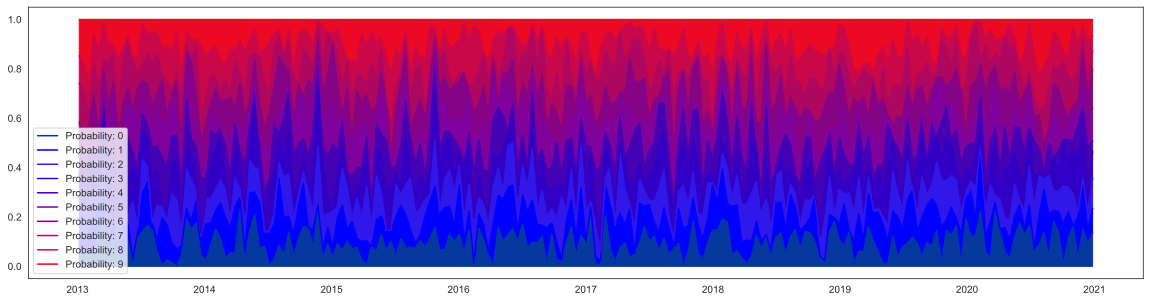

In [68]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)
colors = ['red', 'blue', '#3019E8','#3100c4', '#4302b3','#80029c','#850485', '#ad0760',  '#c90849','#eb0923']


def plot_time_probabilities(pit, fs):
    plt.figure(figsize=fs)
    plt.plot(pit[0], label=f'Probability: {0}', color='#06399e')
    plt.fill_between(pit.index, pit[0], color='#06399e') 
    for i in range(1, 10):
        pit[i] += pit[i-1]
        plt.plot(pit[i], label=f'Probability: {i}', color=colors[i])
        plt.fill_between(pit.index, pit[i-1], pit[i], color=colors[i])
    plt.legend(prop={'size': 10}, loc='lower left')
plot_time_probabilities(probabilities_in_time, figsize)

## Третье задание

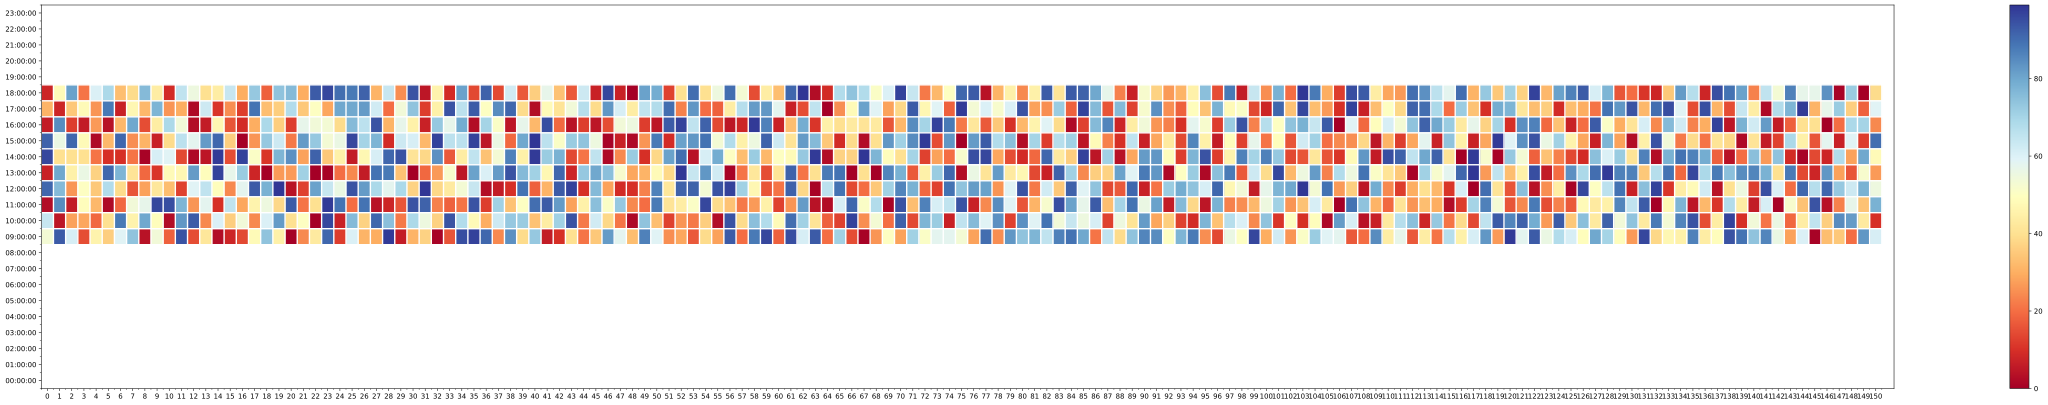

In [107]:
intraday = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday.loc[(intraday.index.hour < 9) | (intraday.index.hour > 18)] = np.nan
def plot_intraday_ts(intraday):
    fig = plt.figure(figsize = (60, 10))
    fig.patch.set_facecolor('white')
    df = intraday.to_frame()
    df = pd.DataFrame({'Date': intraday.index.time, 
                   'Time': intraday.index.date, 
                   'Temperature': df[0]})
    newdf = df.pivot(index='Date', columns='Time', values='Temperature')
    plt.imshow(newdf, cmap='RdYlBu', aspect='auto', origin='lower')
    plt.colorbar()
    ax = plt.gca()
    ax.set_xticks(np.arange(len(newdf.columns)-1))
    ax.set_yticks(np.arange(len(newdf.index)))
    ax.set_yticklabels(newdf.index)
    ax.set_xticks(np.arange(-0.5,len(newdf.columns)-1), minor=True)
    ax.set_yticks(np.arange(-0.5,len(newdf.index)), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=2)
plot_intraday_ts(intraday)

# Конец